In [59]:
from plotnine import *
import sqlite3
import pandas as pd
import numpy as np

In [95]:
#load FVS summary output tables 
# con = sqlite3.connect("../keyfiles/DF_1_mults/DF_1_mults.db")
# DF_1 = pd.read_sql_query("select StandID, Year, Acc, Mort from FVS_Summary", con)
# DF_1['run'] = 'DF_1'
# con.close()

# con = sqlite3.connect("../keyfiles/DF_2_mults/DF_2_mults.db")
# DF_2 = pd.read_sql_query("select StandID, Year, Acc, Mort from FVS_Summary", con)
# DF_2['run'] = 'DF_2'
# con.close()

# con = sqlite3.connect("../keyfiles/DF_3_mults/DF_3_mults.db")
# DF_3 = pd.read_sql_query("select StandID, Year, Acc, Mort from FVS_Summary", con)
# DF_3['run'] = 'DF_3'
# con.close()

con = sqlite3.connect("../keyfiles/high_growth/high_growth_all.db")
high_growth = pd.read_sql_query("select StandID, Year, Acc, Mort from FVS_Summary", con)
high_growth['run'] = 'high_growth'
con.close()

con = sqlite3.connect("../keyfiles/high_mort/high_mort_all.db")
high_mort = pd.read_sql_query("select StandID, Year, Acc, Mort from FVS_Summary", con)
high_mort['run'] = 'high_mort'
con.close()

con = sqlite3.connect("../keyfiles/super_high_mort/super_high_mort_all.db")
super_high_mort = pd.read_sql_query("select StandID, Year, Acc, Mort from FVS_Summary", con)
super_high_mort['run'] = 'super_high_mort'
con.close()

con = sqlite3.connect("../keyfiles/default/default_all.db")
default = pd.read_sql_query("select StandID, Year, Acc, Mort from FVS_Summary", con)
default['run'] = 'default'
con.close()

con = sqlite3.connect("../keyfiles/All_1_mults/All_1_mults_all.db")
All_1 = pd.read_sql_query("select StandID, Year, Acc, Mort from FVS_Summary", con)
All_1['run'] = 'All_1_mults'
con.close()

con = sqlite3.connect("../keyfiles/All_2_mults/All_2_mults_all.db")
All_2 = pd.read_sql_query("select StandID, Year, Acc, Mort from FVS_Summary", con)
All_2['run'] = 'All_2_mults'
con.close()

con = sqlite3.connect("../keyfiles/All_3_mults/All_3_mults_all.db")
All_3 = pd.read_sql_query("select StandID, Year, Acc, Mort from FVS_Summary", con)
All_3['run'] = 'All_3_mults'
con.close()


In [96]:
dfs = [All_1, All_2, All_3, high_growth, high_mort, super_high_mort, default]
summary = pd.concat(dfs)
summary = summary[(summary['Acc'] > 0) | (summary['Mort'] > 0)]

In [97]:
STAND_DATA = '../data/groundtruth.xlsx'
observed = pd.read_excel(STAND_DATA)[['stand_id', 'Acc', 'Mort']]
observed = observed.rename(columns={'Acc':'obs_acc', 'Mort':'obs_mort'})
summary_obs = summary.merge(observed, left_on = 'StandID', right_on = 'stand_id')[['StandID', 'run', 'Acc', 'Mort', 'obs_acc', 'obs_mort']]

In [98]:
summary_obs.to_excel('../data/fvs.xlsx')

/home/sloreno/mambaforge/envs/geo/lib/python3.10/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 571 rows containing missing values.


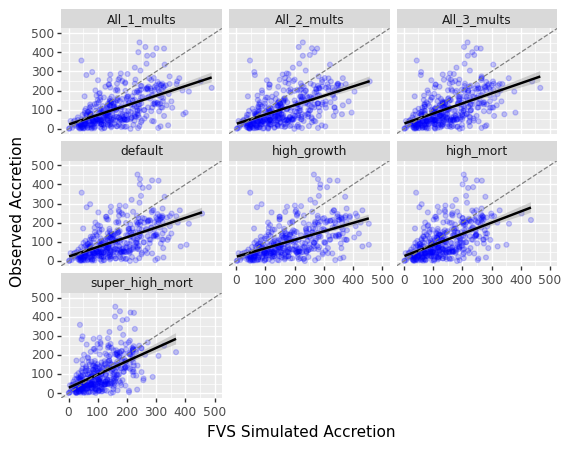

<ggplot: (8747789065472)>

In [100]:

(ggplot(summary_obs)
 + facet_wrap("~run")
 + aes(x="Acc", y="obs_acc")
 + scale_y_continuous(limits = (0, 500))
 + scale_x_continuous(limits = (0, 500))
+ geom_point(color = 'blue', alpha = .2)
+ geom_smooth(method = "lm",)
+ geom_abline(intercept=0, slope=1 , color = 'grey', linetype = 'dashed')
+ xlab("FVS Simulated Accretion")
+ ylab("Observed Accretion"))


/home/sloreno/mambaforge/envs/geo/lib/python3.10/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 233 rows containing missing values.


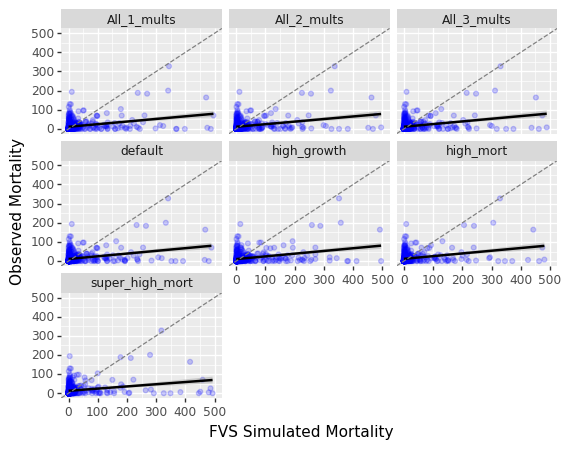

<ggplot: (8747789346820)>

In [101]:
(ggplot(summary_obs)
 + facet_wrap("~run")
 + aes(x="Mort", y="obs_mort")
 + scale_y_continuous(limits = (0, 500))
 + scale_x_continuous(limits = (0, 500))
+ geom_point(color = 'blue', alpha = .2)
+ geom_smooth(method = "lm",)
+ geom_abline(intercept=0, slope=1 , color = 'grey', linetype = 'dashed')
+ xlab("FVS Simulated Mortality")
+ ylab("Observed Mortality"))